In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import numpy as np
import Functions
import pickle
import os
from matplotlib.colors import LogNorm
import time
import Functions

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.size'] = '16'

In [3]:
EventNames = ['AGN', 'CART', 'EB', 'ILOT', 'KN_B19', 'KN_K17', 'MIRA', 'Mdwarf',
              'PISN', 'RRL', 'SLSN-I', 'SNII-NMF', 'SNII-Templates', 'SNIIn',
              'SNIa-91bg', 'SNIa-SALT2', 'SNIax', 'SNIbc-MOSFIT',
              'SNIbc-Templates', 'TDE', 'V19_CC+HostXT', 'uLens-Binary',
              'uLens-Single-GenLens', 'uLens-Single_PyLIMA']

RateDict = {key:1 for key in EventNames}
RateDict['KN_B19'] = 0
RateDict['KN_K17'] = 0
# RateDict['V19_CC+HostXT'] = 0

In [4]:
PathCubeFolder = '/global/cscratch1/sd/lianming/Results/FullRunTest_1000ObjNo'
CubeFileNames = os.listdir(PathCubeFolder)

In [5]:
CubeFileNames

['ProbCube_1229_1826__MIRA.pkl',
 'ProbCube_1229_1822__SLSN-I.pkl',
 'ProbCube_1229_0821__SNIa-SALT2.pkl',
 'ProbCube_1229_1827__EB.pkl',
 'ProbCube_1229_1810__ILOT.pkl',
 'ProbCube_1229_1826__PISN.pkl',
 'ProbCube_1229_0821__uLens-Single-GenLens.pkl',
 'ProbCube_1229_1826__Mdwarf.pkl',
 'ProbCube_1229_1819__AGN.pkl',
 'ProbCube_1229_0821__SNIax.pkl',
 'ProbCube_1229_0821__SNIbc-MOSFIT.pkl',
 'ProbCube_1229_0821__SNIa-91bg.pkl',
 'ProbCube_1229_0821__SNIbc-Templates.pkl',
 'ProbCube_1229_1827__RRL.pkl',
 'ProbCube_1229_0821__TDE.pkl',
 'ProbCube_1229_1815__SNII-Templates.pkl',
 'ProbCube_1229_0821__SNIIn.pkl',
 'ProbCube_1229_1813__SNII-NMF.pkl',
 'ProbCube_1229_0821__V19_CC+HostXT.pkl',
 'ProbCube_1229_0821__uLens-Single_PyLIMA.pkl',
 'ProbCube_1229_0822__uLens-Binary.pkl',
 'ProbCube_1229_1816__CART.pkl']

In [27]:
CubeFileNames = CubeFileNames[1:]

In [11]:
CubeFileNames.sort()

In [6]:
#Calculate the total cube

CubeFileName = CubeFileNames[0]
EventName = CubeFileName[ CubeFileName.rfind('__')+2 : CubeFileName.rfind('.') ]
CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

with open(CubeFilePath, 'rb') as f:
    InfoDict = pickle.load(f)
    Cube = pickle.load(f)

TotalCube = Cube * ( RateDict[EventName] / InfoDict.pop('ObjectNo') )

del InfoDict['EventName']
del InfoDict['PointsPerDay']
del InfoDict['dMagRange']
del InfoDict['ColorRange']
InfoDict.pop('Outliers', None)
InfoDict.pop('OutliersRatio', None)
InfoDict.pop('Overflow', None)

for CubeFileName in CubeFileNames[1:]:
    
    print('|', end='')

    EventName = CubeFileName[ CubeFileName.rfind('__')+2 : CubeFileName.rfind('.') ]
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        infoDict = pickle.load(f)
        Cube = pickle.load(f)

    TotalCube = TotalCube + Cube * ( RateDict[EventName] / infoDict.pop('ObjectNo') )

if TotalCube.min() < 0:
    print('Data overflow, please check!')


|||||||||||||||||||||

In [7]:
#Normalization
TotalCubeNorm = TotalCube / TotalCube.max(-1, keepdims=True).max(-2, keepdims=True)
np.nan_to_num(TotalCubeNorm, copy=False);

In [8]:
TotalCubeNorm = np.float32(TotalCubeNorm)

In [9]:
#Save the TotalCube together with the InfoDict
with open('TotalCubeNorm_1000Obj.pkl', 'wb') as f:
    pickle.dump(InfoDict, f)
    pickle.dump(TotalCubeNorm, f ) 

In [8]:
InfoDict

{'BandPairs': ['ug',
  'ur',
  'ui',
  'uz',
  'gu',
  'gr',
  'gi',
  'gz',
  'gy',
  'ru',
  'rg',
  'ri',
  'rz',
  'ry',
  'iu',
  'ig',
  'ir',
  'iz',
  'iy',
  'zu',
  'zg',
  'zr',
  'zi',
  'zy',
  'yg',
  'yr',
  'yi',
  'yz'],
 'dT1s': array([-480, -465, -450, -435, -420, -405, -390, -375, -360, -345, -330,
        -315, -300, -285, -270, -255, -240, -225, -210, -195, -180, -165,
        -150, -135, -120, -105,  -90,  -75,  -60,  -45,  -30,  -15,    0,
          15,   30,   45,   60,   75,   90,  105,  120,  135,  150,  165,
         180,  195,  210,  225,  240,  255,  270,  285,  300,  315,  330,
         345,  360,  375,  390,  405,  420,  435,  450,  465,  480]),
 'dT2s': array([-1920, -1890, -1860, -1830, -1800, -1770, -1740, -1710, -1680,
        -1650, -1620, -1590, -1560, -1530, -1500, -1470, -1440,  -480,
         -450,  -420,  -390,  -360,  -330,  -300,  -270,  -240,  -210,
         -180,  -150,  -120,   -90,   -60,   -30,     0,    30,    60,
           90,   120, 

In [9]:
pwd

'/global/u2/l/lianming/Presto-Color-2'

In [17]:
def PlotCubeSlice(DataCube, InfoDict, Band1, Band2, dT1, dT2):

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))

    Map = Enquiry(DataCube, InfoDict, Band1, Band2, dT1, dT2) * 10000000

    plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, 
               norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
    plt.xlim([-1.5, 2])
    plt.ylim([-5, 8])

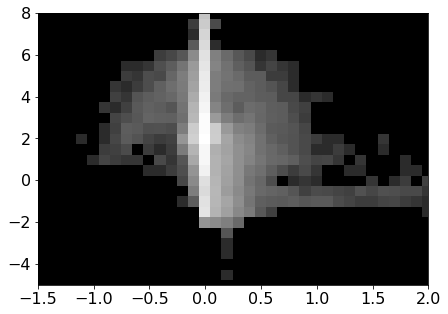

In [36]:
PlotCubeSlice(TotalCubeNorm, InfoDict, 'u', 'z', 21, 420)
# plt.scatter(data6060[0], data6060[1], c='salmon', s=10, alpha=0.2)

||||||||||||||||||||||||

(-5.0, 8.0)

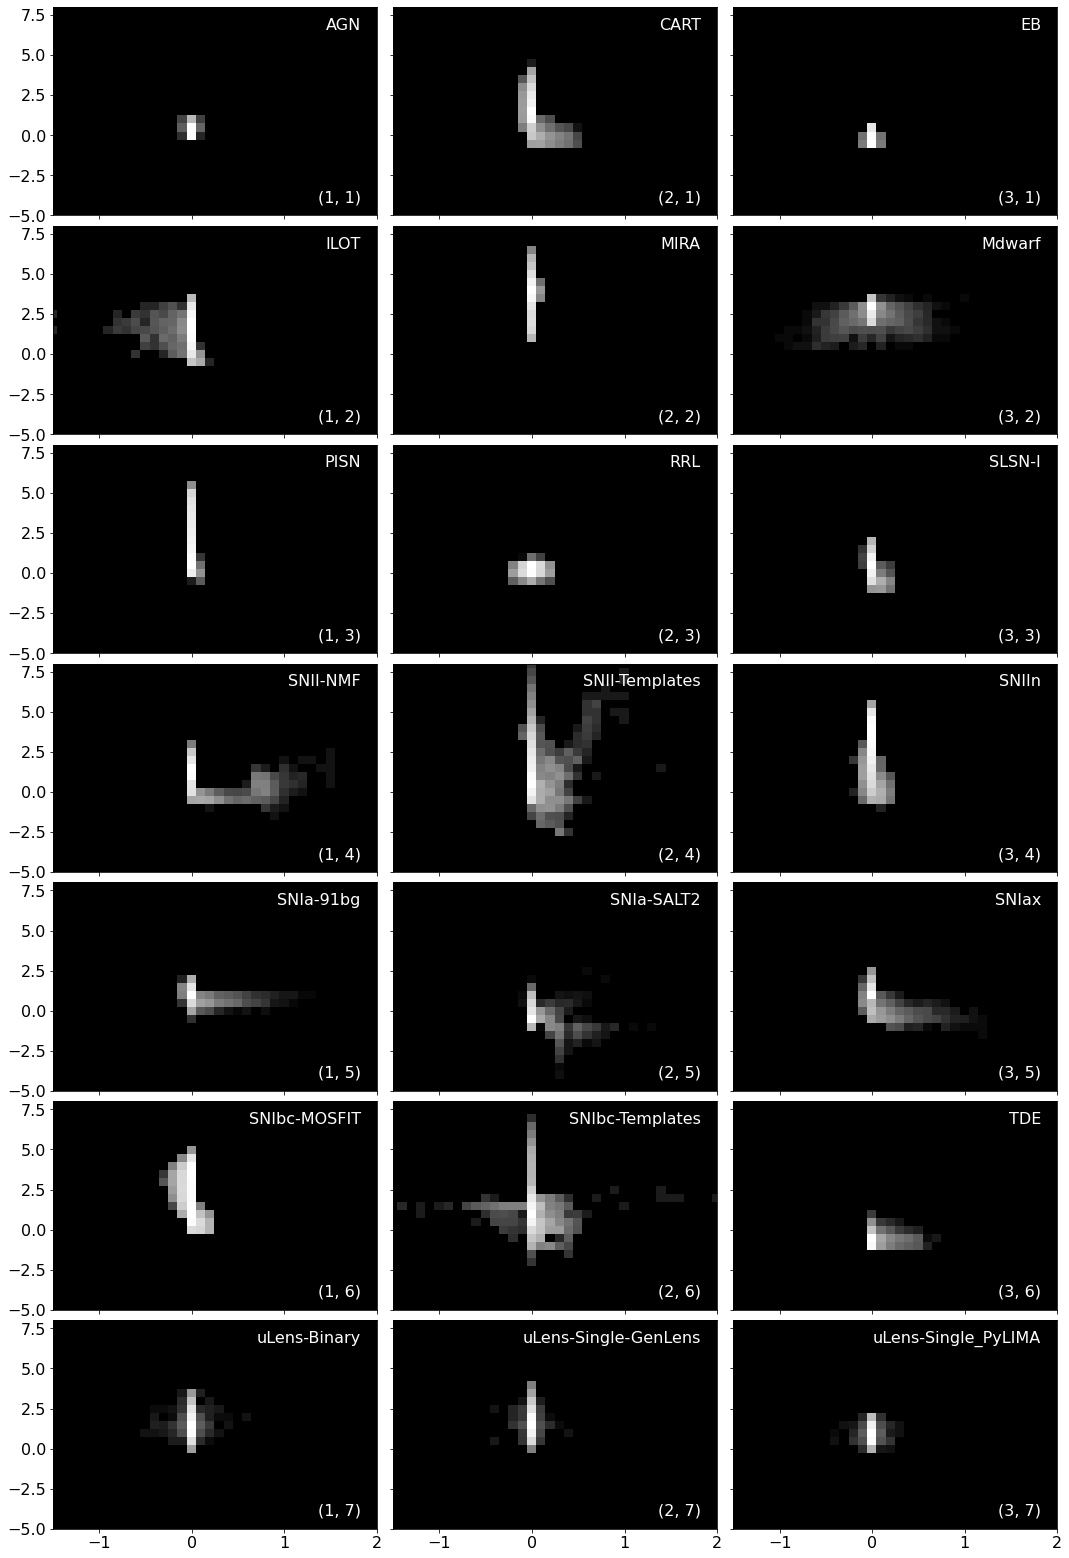

In [39]:
Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 450

Space = 0.05
ColNo = 3
RowNo = 7

fig, axs = plt.subplots(RowNo, ColNo, figsize = (18, 4*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, dT1, dT2)    
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii%3+1, ii//3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||||||||||||||||||||||||

(-5.0, 8.0)

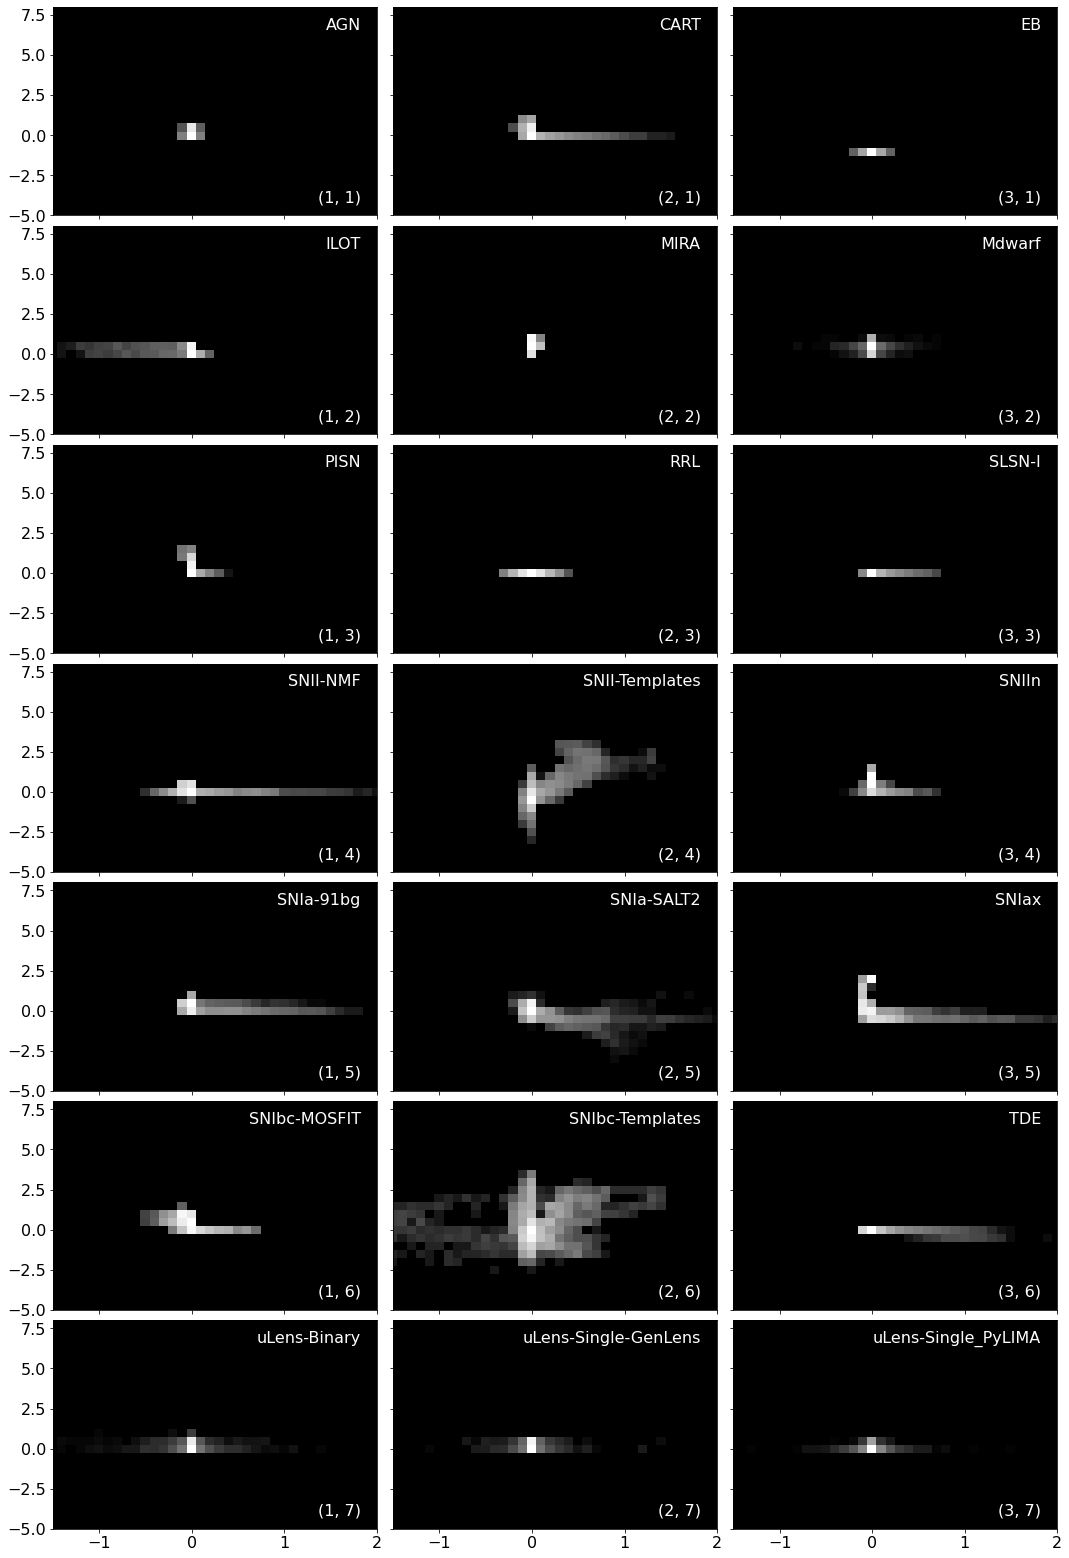

In [40]:
Band1 = 'z'
Band2 = 'y'
dT1 = -60
dT2 = 1450

Space = 0.05
ColNo = 3
RowNo = 7

fig, axs = plt.subplots(RowNo, ColNo, figsize = (18, 4*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, dT1, dT2)    
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii%3+1, ii//3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


# Some Previous Plots 

In [117]:
DataKN = [data6060, data45060, data60450]

||

<ipython-input-127-73830bd63264>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

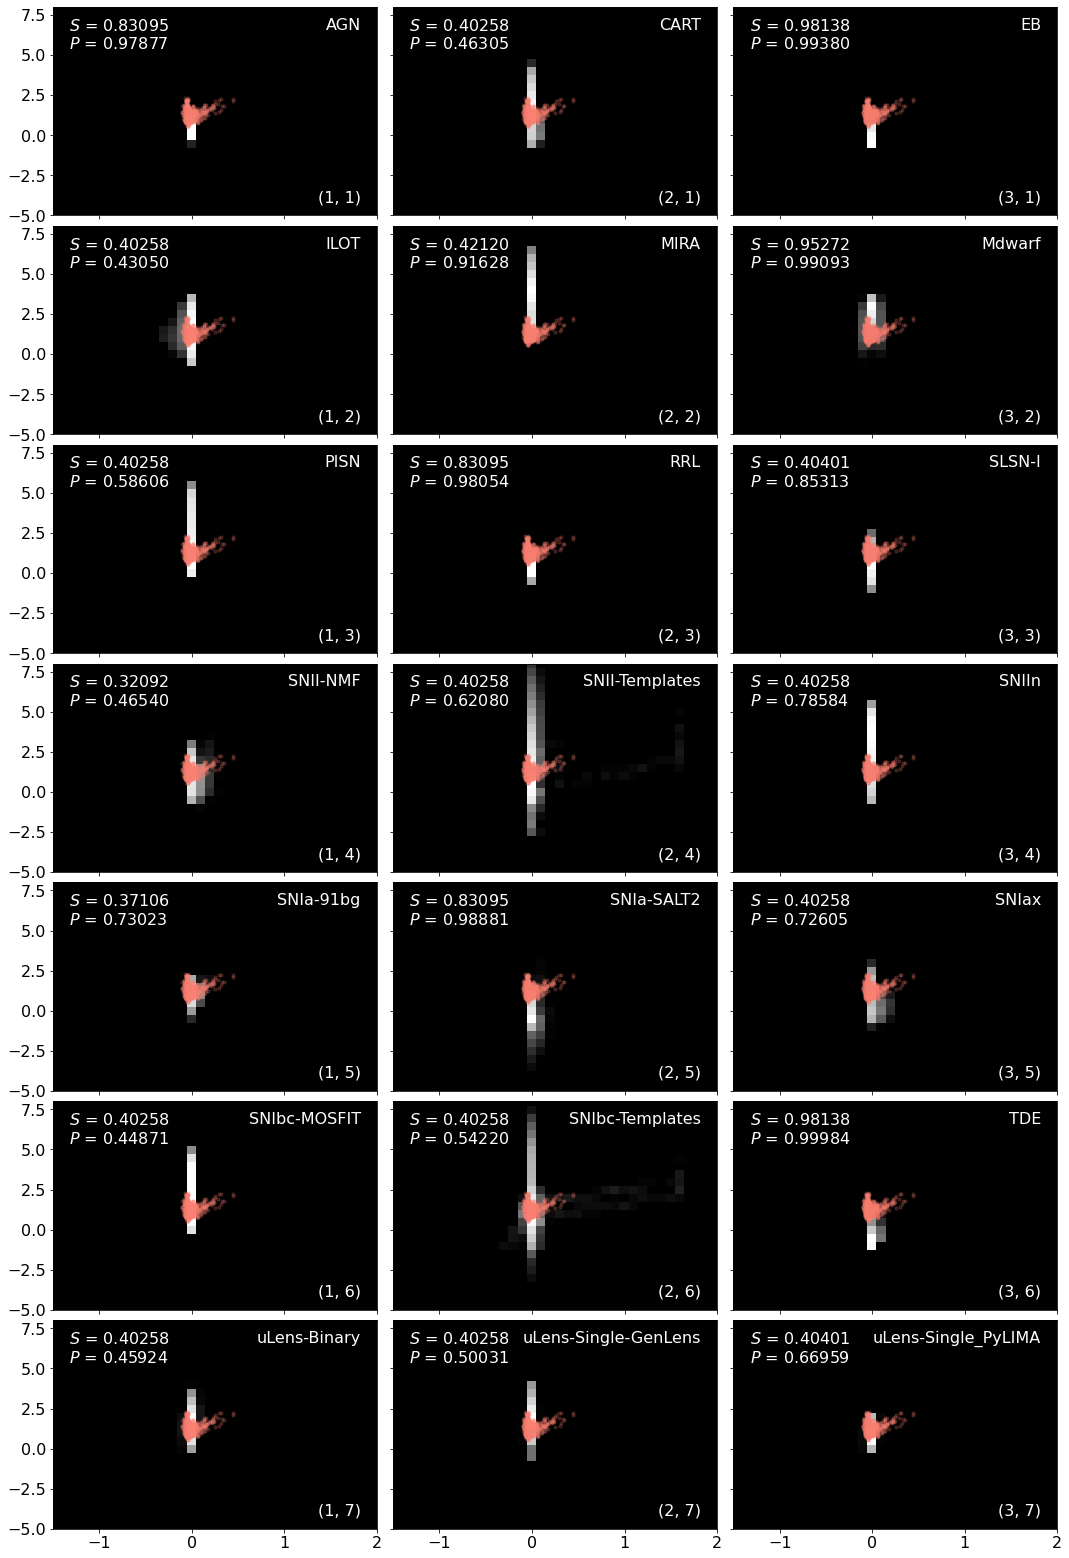

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 1

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (18, 4*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.5f}\n$P$ = {:.5f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii%3+1, ii//3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||

<ipython-input-136-e321abc35845>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

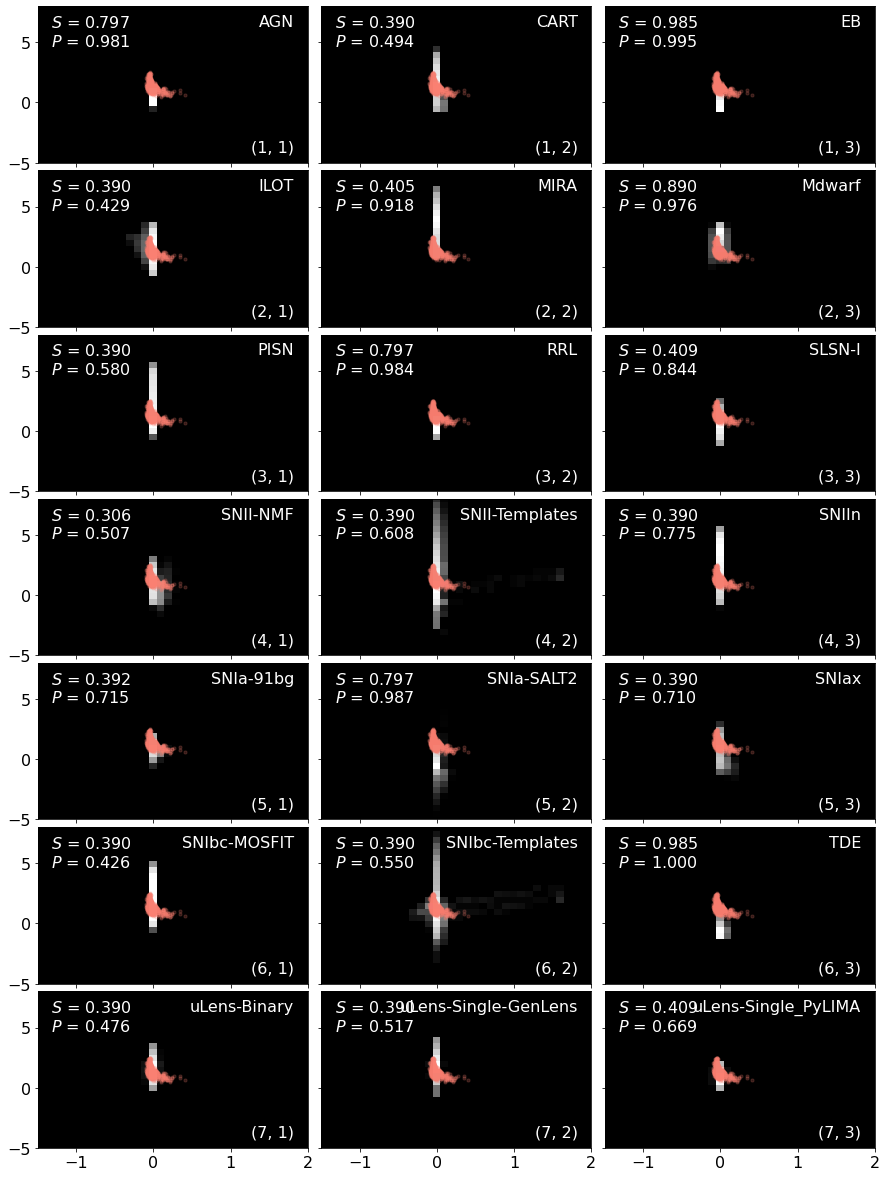

In [136]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 0

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (15, 3*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||

<ipython-input-137-0f0b963e97d9>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

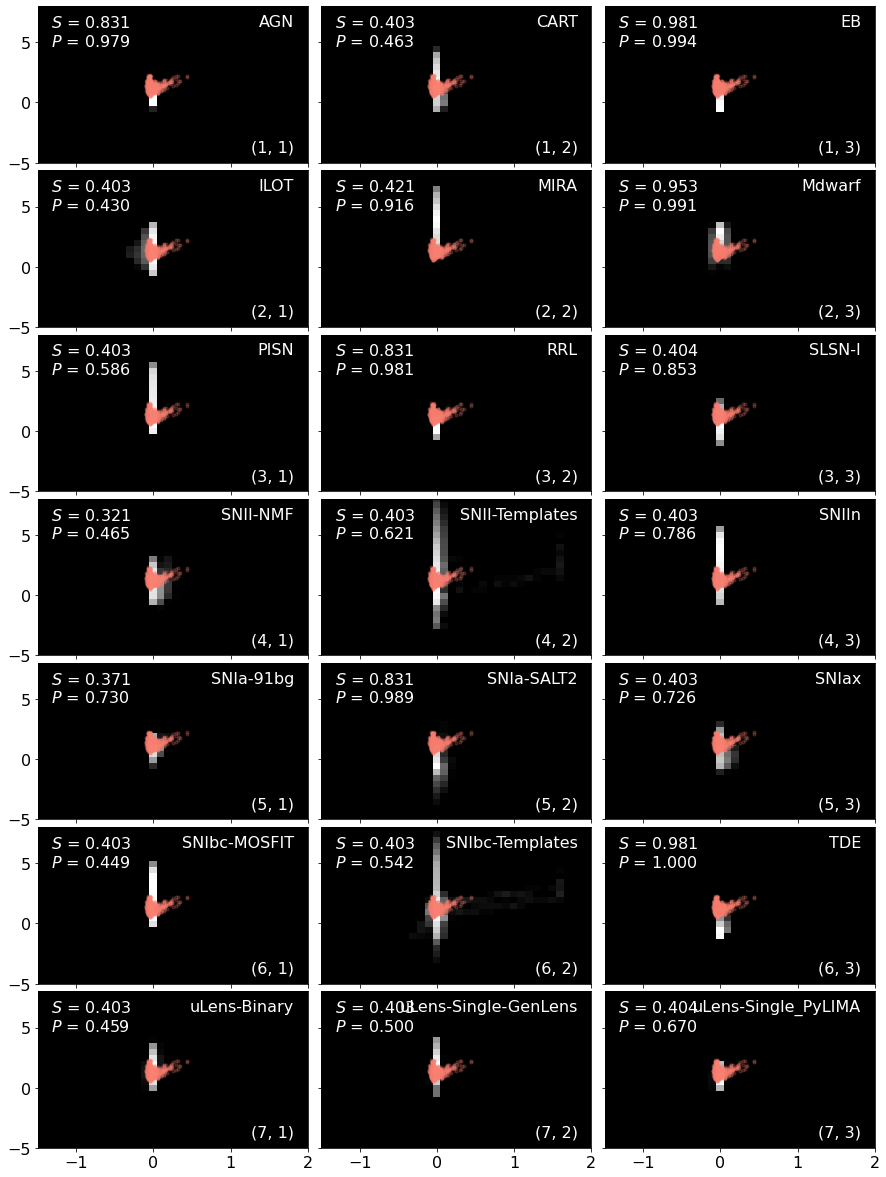

In [137]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 1

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (15, 3*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||

<ipython-input-138-b33a204e6089>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

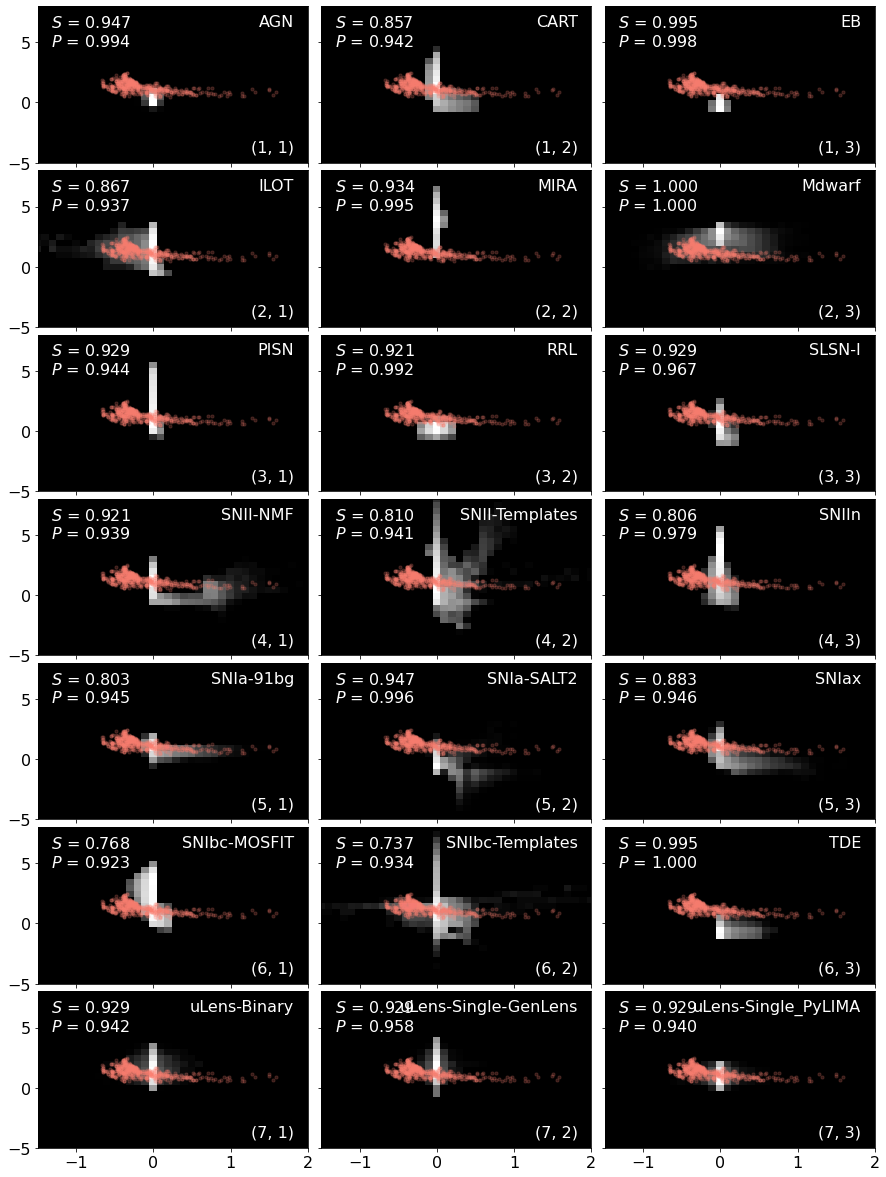

In [138]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 2

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (15, 3*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||||||||||||||||||||||||

(-5.0, 8.0)

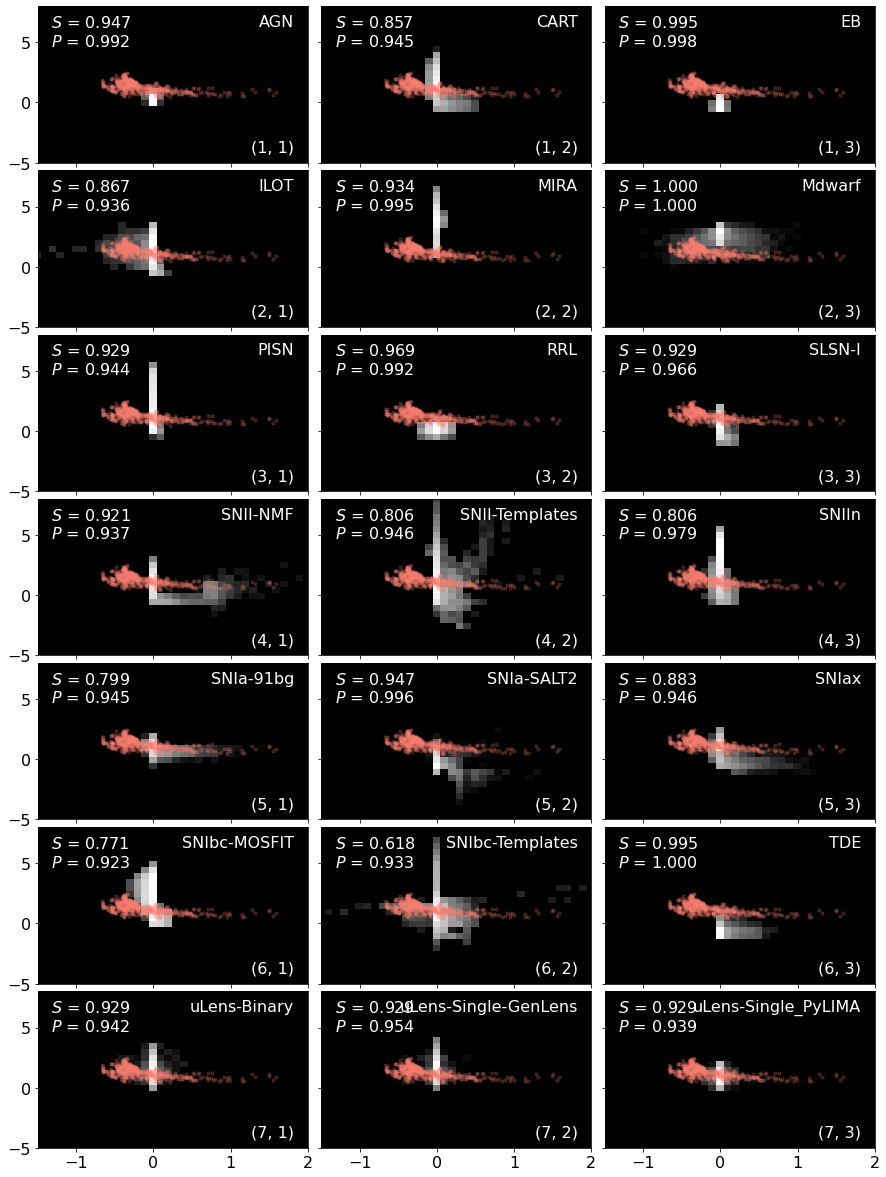

In [127]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 2

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (15, 3*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


|

<ipython-input-30-e0f78d7cedfd>:21: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||

(-5.0, 8.0)

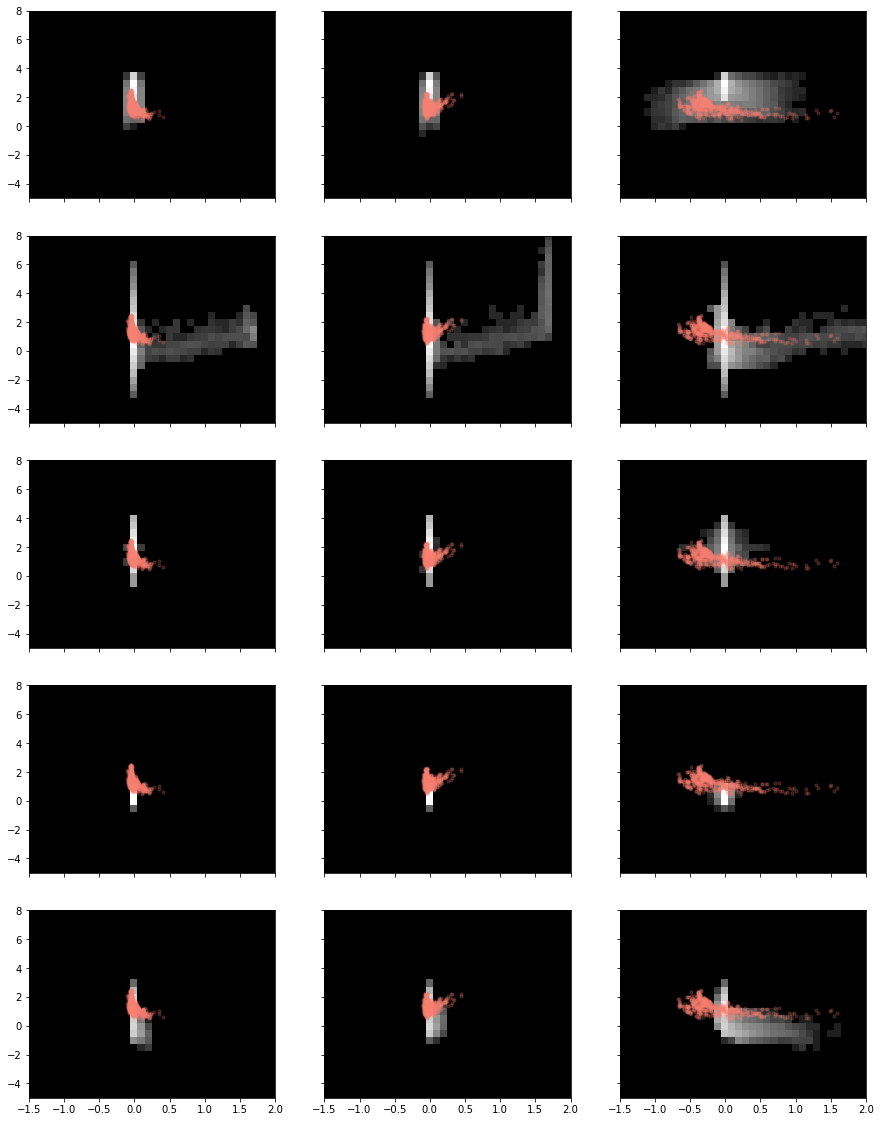

In [30]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]

RowNo = 5

fig, axs = plt.subplots(RowNo, 3, figsize = (15, 4*RowNo), sharex=True, sharey=True)

for ii, CubeFileName in enumerate(CubeFileNames[:RowNo]):
    
    print('|', end='')

    EventName = CubeFileName[ CubeFileName.rfind('__')+2 : CubeFileName.rfind('.') ]
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    for jj in range(3):
        
        Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj]) * 10000000
        
        axs[ii,jj].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
        axs[ii,jj].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    

In [18]:
Map = Enquiry(DataCube, InfoDict, Band1, Band2, *TimeGaps[0]) * 10000000

NameError: name 'DataCube' is not defined

# Get KNe Data

In [24]:
FilePath = '/global/homes/l/lianming/Presto-Color-2/data/P1Day_Interp/KN_B19_Interp.pkl'

In [25]:
with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

In [26]:
data6060 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 60, PointsPDay=12, ObjNo=100, SeedObj=113)

In [27]:
data45060 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 450, 60, PointsPDay=12, ObjNo=100, SeedObj=113)

In [28]:
data60450 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 450, PointsPDay=12, ObjNo=100, SeedObj=113)

In [29]:
data60300 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 300, PointsPDay=12, ObjNo=100, SeedObj=113)

In [30]:
data60450.shape

(2, 547)

In [63]:
Data = np.transpose(data7530)

Band1 = 'g'
Band2 = 'i'
dT1 = 75
dT2 = 30

thr = 0.003

P = 0

for ii in Data:
    
    if Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) < thr:
        P += 1
        
print(P)

59


In [64]:
Data = np.transpose(data60120)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 120

thr = 0.003

P = 0

for ii in Data:
    
    if Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) < thr:
        P += 1
        
print(P)

487


In [65]:
Data = np.transpose(data60450)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 450

thr = 0.003

P = 0

for ii in Data:
    
    if Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) < thr:
        P += 1
        
print(P)

486


In [100]:
Data = np.transpose(data7530)

Band1 = 'g'
Band2 = 'i'
dT1 = 75
dT2 = 30
P = 0

for ii in Data:
    
    P += Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) 
        
print(P)

456.6705380410647


In [67]:
Data = np.transpose(data60120)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 120

thr = 0.003

P = 0

for ii in Data:
    
    P += Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) 
        
print(P)

132.43803673072273


In [68]:
Data = np.transpose(data60450)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 450

thr = 0.003

P = 0

for ii in Data:
    
    P += Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) 
        
print(P)

36.120293490157124


# Scores

In [242]:
def Score1(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2, thr):
    
    FTData = Functions.CalculateMap(FTInterp, FTTimeRange, Band1, Band2, dT1, dT2, PointsPDay=12, ObjNo=100, SeedObj=113)    
    FTHist,_,_ = np.histogram2d(FTData[0], FTData[1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])
    
    Map = Enquiry(CubeData, InfoDict, Band1, Band2, dT1, dT2)
    
    Mask = Map < thr
    
    Score = FTHist[Mask].sum() / FTHist.sum()
    
    return Score

In [243]:
def Score2(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2):
    
    FTData = Functions.CalculateMap(FTInterp, FTTimeRange, Band1, Band2, dT1, dT2, PointsPDay=12, ObjNo=100, SeedObj=113)    
    FTHist,_,_ = np.histogram2d(FTData[0], FTData[1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])
    
    Map = Enquiry(CubeData, InfoDict, Band1, Band2, dT1, dT2)
    
    Score = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    return Score

In [244]:
def ScoreMap2(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2):
    
    xx = ( InfoDict['dT2s'][:-1] + InfoDict['dT2s'][1:] )/2                      
    yy = ( InfoDict['dT1s'][:-1] + InfoDict['dT1s'][1:] )/2 
    
    Scores = np.zeros( [len(yy), len(xx)] )
    
    for ii, dT1 in enumerate(yy):
        for jj, dT2 in enumerate(xx):
            
            Scores[ii, jj] = Score2(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2)
            
    plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores)
    plt.xlabel('dT2')
    plt.ylabel('dT1')
    plt.colorbar()
    
    return Scores

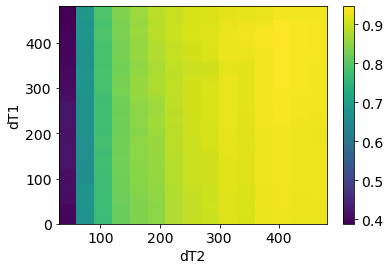

In [245]:
Scores2 = ScoreMap2(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i')

In [248]:
def ScoreMap1(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, thr):
    
    xx = ( InfoDict['dT2s'][:-1] + InfoDict['dT2s'][1:] )/2                      
    yy = ( InfoDict['dT1s'][:-1] + InfoDict['dT1s'][1:] )/2 
    
    Scores = np.zeros( [len(yy), len(xx)] )
    
    for ii, dT1 in enumerate(yy):
        for jj, dT2 in enumerate(xx):
            
            Scores[ii, jj] = Score1(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2, thr)
            
    plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores)    
    plt.xlabel('dT2')
    plt.ylabel('dT1')    
    plt.colorbar()
    
    return Scores

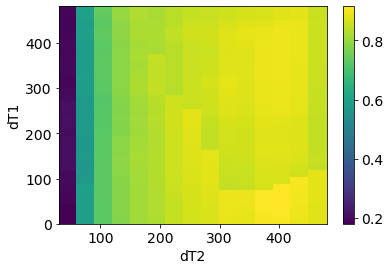

In [249]:
Scores1 = ScoreMap1(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 0.003)

In [ ]:
plt.clim(-0.2,0.2)

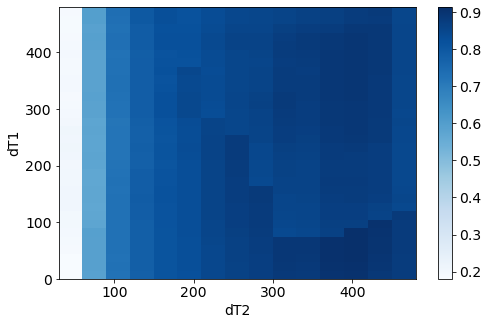

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores1, cmap='')    
plt.xlabel('dT2')
plt.ylabel('dT1')
# plt.clim(0,1)
plt.colorbar()
# plt.xlim([45,None])

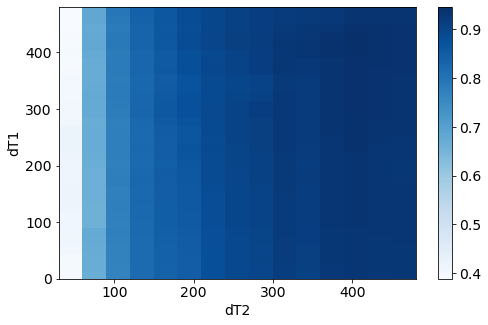

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores2, cmap='Blues')
plt.xlabel('dT2')
plt.ylabel('dT1')
plt.colorbar()
# plt.clim(0,1)
# plt.xlim([45,None])

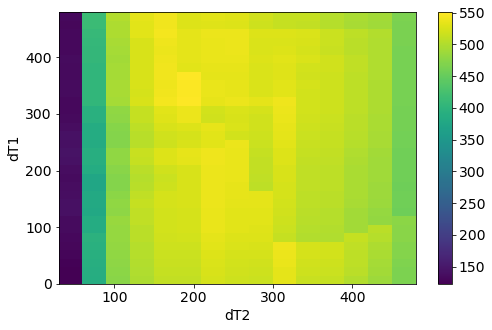

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores1)    
plt.xlabel('dT2')
plt.ylabel('dT1')
plt.colorbar()
# plt.xlim([45,None])

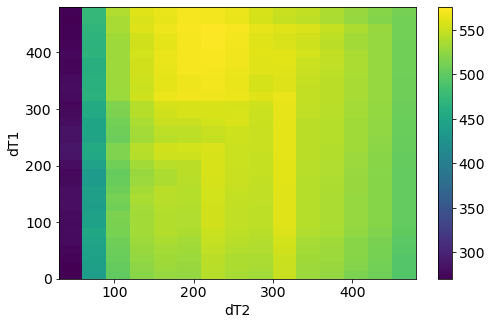

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores2)    
plt.xlabel('dT2')
plt.ylabel('dT1')
plt.colorbar()
# plt.xlim([45,None])